
# Introduction

Le machine learning consiste à faire ingérer des données par un ordinateur à travers des calculs statistiques. 

Cette ingestion peut-être supervisée, on donne à l'ordinateur la cible à atteindre ; ou non supervisée, l'ordinateur étudiera les caractéristiques des différentes données pour répondre.

Il existe 2 grands types d'algorythmes en machine learning :
**La classification**, dont l'objectif est de prédire l'appartenance à une catégorie.
**La regression**, dont l'obectif est de déterminer une loi mathématique à partir d'une tendance, la corrélation.

Dans ce notebook, nous allons découvrir les 2 grands types d'algorythmes, mais d'abord, prenons connaissance de notre jeu de données.

# Description du cas
Votre campagne d'entretien annuelle est terminée. De chacun des managers vous avez obtenu :

- Les évaluations sur les soft skills, les hard skills, et la performance globale
- La distribution de la prime de 2000€ pour performance exceptionnelle 
- La répartition des augmentations individuelles sur l'année.


Bien entendu, en tant que RH, il vous faut vérifier que les données sont cohérentes.

Nous allons donc commencer par explorer les données.

In [1]:
import pandas as pd

data ="https://raw.githubusercontent.com/ArnaudCoulon/MyPeopleAnalytics.fr/main/Analytics/introduction_ML/Database_intro_ML.csv"

df = pd.read_csv(data)

print(df.shape)
print(df.dtypes)

(500, 8)
Matricule                   object
Emploi                      object
Performance globale        float64
Performance hard skills      int64
Performance soft skills      int64
Rémunération               float64
Prime 2000€                  int64
Augmentation               float64
dtype: object


In [2]:
df.head()

,Matricule,Emploi,Performance globale,Performance hard skills,Performance soft skills,Rémunération,Prime 2000€,Augmentation
0,A001,Administratif,2.0,3,1,1964.872127,0,0.0
1,A002,Administratif,5.0,5,5,2149.034296,0,4.0
2,A003,Administratif,2.5,2,3,1986.824596,0,2.0
3,A004,Administratif,4.0,5,3,2071.828183,0,5.0
4,A005,Administratif,2.0,1,3,1964.872127,0,0.0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Performance globale,500.0,2.575500,1.279237,0.0,1.500000,2.500000,3.500000,5.00000
Performance hard skills,500.0,2.524000,1.727249,0.0,1.000000,2.000000,4.000000,5.00000
Performance soft skills,500.0,2.616000,1.690639,0.0,1.000000,3.000000,4.000000,5.00000
Rémunération,500.0,2966.028434,1403.464335,1900.0,2011.700002,2389.627019,3395.612425,7294.49005
Prime 2000€,500.0,0.080000,0.271565,0.0,0.000000,0.000000,0.000000,1.00000
Augmentation,500.0,1.698000,1.692491,0.0,0.000000,1.000000,3.000000,5.00000


# Classification

Analysons la répartition des primes pour performance exceptionnelle.

In [4]:
df_group_prime = df.groupby('Prime 2000€')

df_group_prime.size()

#8% des salariés bénéficient de la prime

Prime 2000€
0    460
1     40
dtype: int64

In [5]:
table = pd.pivot_table(data=df,index=['Emploi', "Prime 2000€"])
table

#On constate que la règle a été respectée, les salariés bénéficiant de la prime (1) présentent bien des performances supérieures à ceux n'en bénéficiant pas (0).

Augmentation  ...  Rémunération
Emploi        Prime 2000€                ...              
Administratif 0                1.484043  ...   1995.125600
              1                3.916667  ...   2118.274838
Commerciaux   0                1.507353  ...   4467.597994
              1                4.071429  ...   6972.885303
Technicien    0                1.492647  ...   2484.723972
              1                4.142857  ...   2812.508883

[6 rows x 5 columns]

In [6]:
import numpy as np
table = pd.pivot_table(data=df,index=['Emploi', "Prime 2000€"],aggfunc=np.median)
table

#C'est aussi le cas lorsque l'on observe la mediane.

Augmentation  ...  Rémunération
Emploi        Prime 2000€                ...              
Administratif 0                     1.0  ...   1986.824596
              1                     4.0  ...   2108.021685
Commerciaux   0                     1.0  ...   3947.734041
              1                     4.0  ...   7294.490050
Technicien    0                     1.0  ...   2456.324874
              1                     4.5  ...   2794.341244

[6 rows x 5 columns]

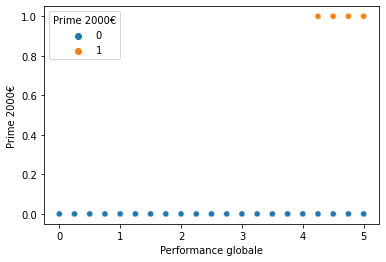

In [17]:
import seaborn as sns

sns.scatterplot(y = "Prime 2000€", x="Performance globale",data =df, hue ="Prime 2000€")
#Mais lorsque l'on regarde la distribution, il semble que l'information seule de la performance globale ne suffise pas à distribuer la prime.

## Péripétie

Un manager n'arrive pas à se décider dans l'attrbution de la prime de 2 000€. Il vous est demandé donner de la visibilité sur le montant qui sera distribué.

Pour cela, nous pouvons nous appuyer sur les décisions prises par les autres managers et conclure d'un comportement similaire.

Nous utiliserons la seule règle donnée pour la distribution de la prime : *récompenser une performance excpetionnelle*.


Il est important d'avoir en tête que les machines ne sont pas à l'aise avec les données catégorielles comme les emplois. Nous appliquer appliquer un *One Hot Encoding*, permettant de rendre ces données plus intelligibles pour une machine.

In [26]:
one_hot = pd.get_dummies(df["Emploi"], prefix = "Emploi")

print(one_hot)

     Emploi_Administratif  Emploi_Commerciaux  Emploi_Technicien
0                       1                   0                  0
1                       1                   0                  0
2                       1                   0                  0
3                       1                   0                  0
4                       1                   0                  0
..                    ...                 ...                ...
495                     0                   1                  0
496                     0                   1                  0
497                     0                   1                  0
498                     0                   1                  0
499                     0                   1                  0

[500 rows x 3 columns]


In [29]:
#Ajoutons ces données encodées à notre jeu de données

df = df.join(one_hot)

df.head()

,Matricule,Emploi,Performance globale,Performance hard skills,Performance soft skills,Rémunération,Prime 2000€,Augmentation,Emploi_Administratif,Emploi_Commerciaux,Emploi_Technicien
0,A001,Administratif,2.0,3,1,1964.872127,0,0.0,1,0,0
1,A002,Administratif,5.0,5,5,2149.034296,0,4.0,1,0,0
2,A003,Administratif,2.5,2,3,1986.824596,0,2.0,1,0,0
3,A004,Administratif,4.0,5,3,2071.828183,0,5.0,1,0,0
4,A005,Administratif,2.0,1,3,1964.872127,0,0.0,1,0,0


## Constitution des bases de test et d'entrainement

Afin de constituer notre modèle, nous allons séparer nos données  en deux bases: 
- Une base d'apprentissage pour 90% des données disponibles. Cette base servira à entrainter l'ordinateur
- Une base de test pour les 10% des données restantes. Cette base servira à confronter les résultats de l'entrainement avec les données

Pour faire simple, nous utiliserons une méthode de sélection aléatoire.


In [269]:
df_train = df.sample(frac = 0.9)

df_test=df.drop(df_train.index)

print(df_train.shape)
print(df_test.shape)

(450, 11)
(50, 11)


In [270]:
df.columns

Index(['Matricule', 'Emploi', 'Performance globale', 'Performance hard skills',
       'Performance soft skills', 'Rémunération', 'Prime 2000€',
       'Augmentation', 'Emploi_Administratif', 'Emploi_Commerciaux',
       'Emploi_Technicien'],
      dtype='object')

In [271]:
#Nous définissons Y, la variable catégorielle que nous souhaitons prédire. Ici, il s'agit de l'attribution de la prime.
y = df_train["Prime 2000€"]

#Et nous définissons X, les variables permettant d'expliquer la variable Y.
#L'apport du People Analytics par rapport à un Data scientist est structurant. 
#En effet, sur des questions complexes, une expertise métier est essentielle afin de construire et d'affiner le modèle.
#Nous pouvons par exemple exclure les matricules. 
#Nous décidons également de retirer la rémunération puisque cette prime ne doit être attibuée qu'à la performance.
#Nous conservons les emplois car la performance, en tant que manifestation d'une compétence, peut se manifester différement selon les emplois.
variables_test =['Performance globale','Performance hard skills','Performance soft skills','Emploi_Administratif','Emploi_Commerciaux','Emploi_Technicien']
X = df_train[variables_test]

## Construction du modèle de Machine Learning

Nous pouvons maintenant appeler Scikit Learn, la bibliothèque spécialisée dans le machine learning afin de lui poser notre question.

Nous allons utiliser un arbre de décision. Il s'agit d'une méthode simple mais puissante.
Il s'agit de créer une  branches pour chaque variable explicative et va tester poids de cette variable dans l'attribution à une catégorie.

In [272]:
# import du model tree de scikit-learn
from sklearn import tree

#création du modèle d'apprentissage
clf= tree.DecisionTreeClassifier()

#Envoi des données d'apprentissage pour entrainement
clf = clf.fit(X,y)

"\nLes données importantes sont :\n- Le chemin que prend la machine pour traiter les questions. \n- Le coefficient de Gini, qui permet de mesurer l'égalité de notre échantillon sur la variable. Plus cet indice est petit, pour les classes sont concentrées sur un sommet\n"

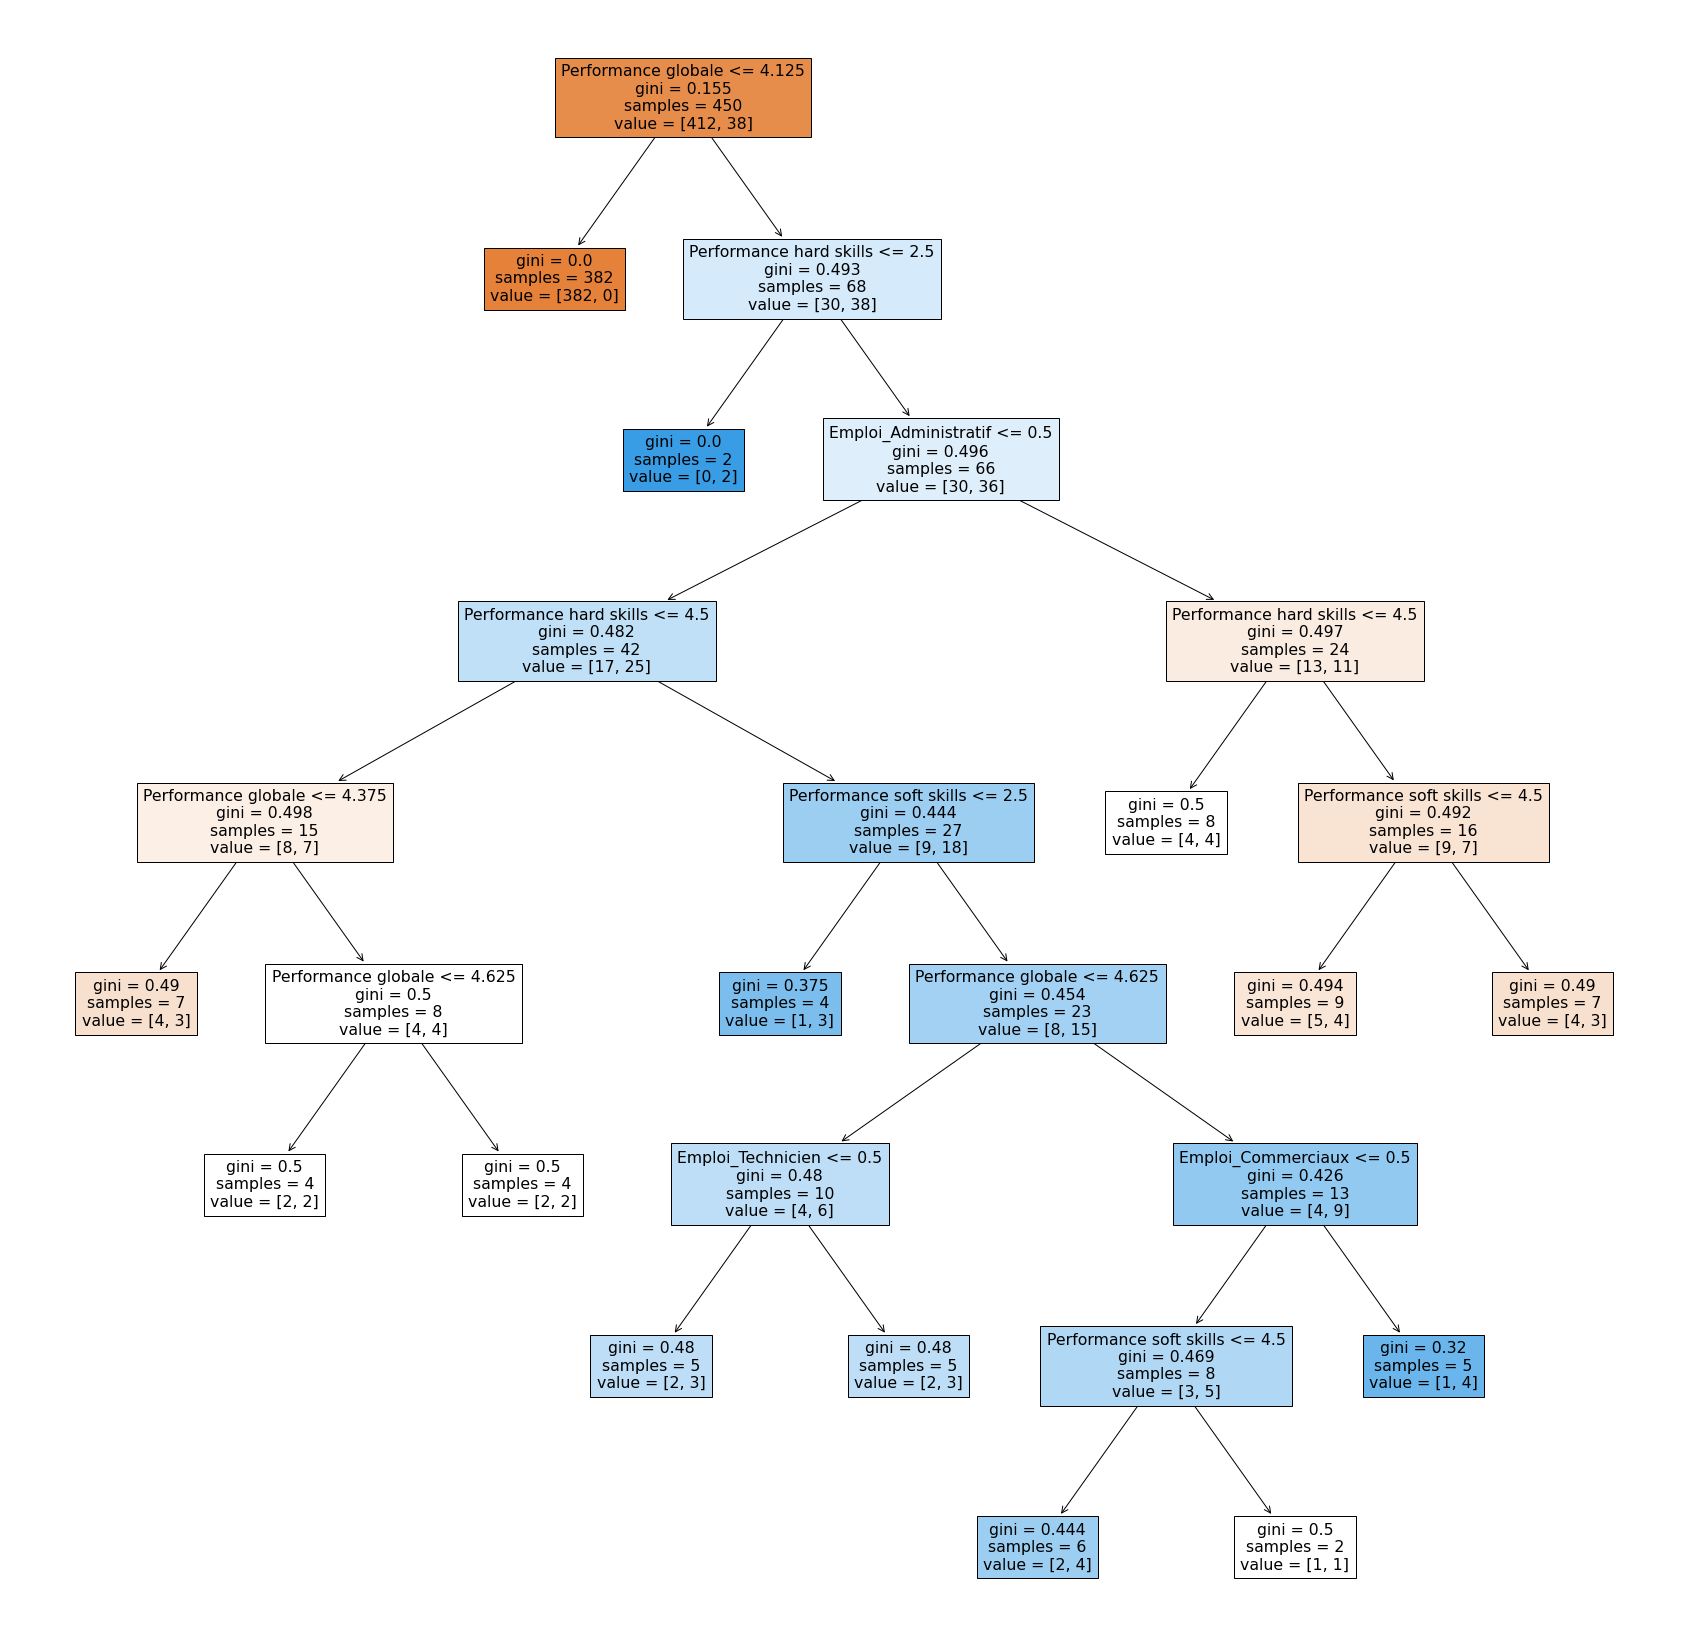

In [284]:
#Une fois l'entrainement réalisé, il est possible d'afficher l'arbre de décision
#En bleu, se trouvent les chemins qui permettent de constater l'attribution d'une prime
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

X_col = X.columns
plt.figure(figsize = (30,30))
plot_tree(clf,feature_names= X_col, filled = True)

"""
Les données importantes sont :
- Le chemin que prend la machine pour traiter les questions. 
- Le coefficient de Gini, qui permet de mesurer l'égalité de notre échantillon sur la variable. Plus cet indice est petit, pour les classes sont concentrées sur un sommet
"""

In [274]:
#On constate que la performance globale est la variable la plus importante suivie des autres sources de performance et des types d'emploi.
impVarFirst={"Variable":X_col,"Importance":clf.feature_importances_}
print(pd.DataFrame(impVarFirst))

                  Variable  Importance
0      Performance globale    0.934733
1  Performance hard skills    0.041722
2  Performance soft skills    0.003888
3     Emploi_Administratif    0.014788
4       Emploi_Commerciaux    0.004868
5        Emploi_Technicien    0.000000


## Test du modèle

Notre modèle étant construit, nous pouvons maintenant passer au test sur l'échantillon restant en passant les mêmes données que pour l'apprentissage.

In [275]:
#Selection des donner à tester
X_test = df_test[variables_test]

#Lancement du test
prediction = pd.DataFrame(clf.predict(X_test))
prediction.columns= ["Prime prediction"]

#Affichage du test
prediction.groupby("Prime prediction").size()

Prime prediction
0    49
1     1
dtype: int64

Nous constatons que la sortie de la prédiction est conforme à l'entrée : 1 lorsqu'une prime est attribuée, 0 lorsqu'aucune prime n'est attribuée.

Ainsi, 1 salarié sur les 50 de notre test voient l'attribution de la prime.

L'attribution était de 8% sur notre jeu de données d'entraiement.
Vérifions la qualité de notre prédiction.

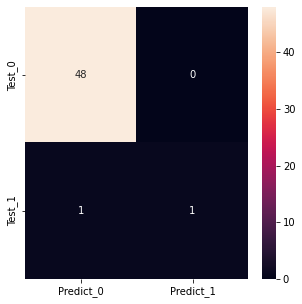

In [276]:
from sklearn import metrics
cm = metrics.confusion_matrix(df_test["Prime 2000€"],prediction)
df_cm = pd.DataFrame(cm, index =["Test_0","Test_1"], columns=["Predict_0","Predict_1"])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot = True)

##Conclusions du test

La matrice de confusion nous montre que notre modèle a prédit correction :
(48+1)/50 = 98% des données.

C'est un bon résultat d'un point de vue statistique. Nous n'avons en effet pas optimisé notre modèle. 48 salariés n'ont pas eu la prime alors qu'elle n'était pas due, et un salarié aura la prime alors qu'elle lui est due.

Néanmoins, cela veut dire que notre modèle n'aurait pas versé la prime à 1 salarié alors qu'elle leur était due, de même, un salarié l'aurait eu à tort. Ce qui est problèmatique.

Nous en concluons que les modèles de machine learning permettent de simplifier et de donner une approximation d'une réalité à partir d'observations. Pour des décisions si critiques, une intelligence humaine doit rester au contrôle

Nous pourrions améliorer notre modèle en :
- Optimisant notre modèle d'apprentissage (affinage des paramètres d'apprentissage, des ratios apprentissage/test)
- Utilisant plus de variables (ancienneté, âge, lieu d'emploi)
- Utilisant un jeu de données d'entrainement plus important (des filiales, des opérations similaires sur des années précédantes)


En pleine connaissance des approximations de notre modèle, nous pouvons appliquer une prédiction.

In [313]:
#Nous téléchargeons les données incomplètes à prédire

data_to_predict = "https://raw.githubusercontent.com/ArnaudCoulon/MyPeopleAnalytics.fr/main/Analytics/introduction_ML/DataSet_introduction_ML_Echantillon.csv"

df_to_predict = pd.read_csv(data_to_predict)

one_hot_predict = pd.get_dummies(df_to_predict["Emploi"], prefix = "Emploi")

df_to_predict = df_to_predict.join(one_hot_predict)

X_predict = df_to_predict[variables_test]


df_to_predict

,Matricule,Emploi,Performance globale,Performance hard skills,Performance soft skills,Emploi_Administratif,Emploi_Commerciaux,Emploi_Technicien
0,D001,Administratif,3,3,2,1,0,0
1,D002,Administratif,3,1,5,1,0,0
2,D003,Administratif,1,1,1,1,0,0
3,D004,Administratif,3,5,0,1,0,0
4,D005,Administratif,3,4,2,1,0,0
5,D006,Technicien,3,3,4,0,0,1
6,D007,Technicien,2,2,0,0,0,1
7,D008,Technicien,3,3,4,0,0,1
8,D009,Technicien,1,0,5,0,0,1
9,D010,Technicien,3,5,2,0,0,1


In [314]:
#Lancement du test
prediction_prod = pd.DataFrame(clf.predict(X_predict))
prediction_prod.columns= ["Prime prediction"]

print(prediction_prod)

#Affichage du test
prediction_prod.groupby("Prime prediction").size()

    Prime prediction
0                  0
1                  0
2                  0
3                  0
4                  0
5                  0
6                  0
7                  0
8                  0
9                  0
10                 1
11                 0
12                 0
13                 0
14                 0


Prime prediction
0    14
1     1
dtype: int64